In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_0_dominance_0.5.csv')

In [4]:
df = df.apply(pd.to_numeric, errors='coerce')

In [5]:
df

,t,count,n,s,h
0,3.0,3,1000,0.0,0.5
1,1.0,1,1000,0.0,0.5
2,3.0,5,1000,0.0,0.5
3,1.0,1,1000,0.0,0.5
4,1.0,1,1000,0.0,0.5
...,...,...,...,...,...
19995,41.0,537,1000,0.0,0.5
19996,3.0,4,1000,0.0,0.5
19997,2.0,2,1000,0.0,0.5
19998,1.0,1,1000,0.0,0.5


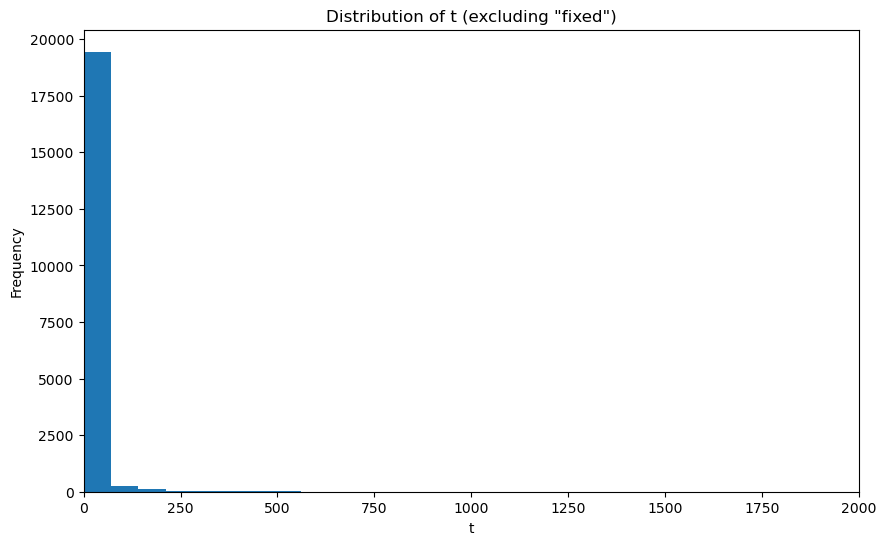

In [7]:
# Filter out rows where t is 'fixed'
filtered_df = df[df['t'] != 'fixed']

# Plot the distribution of t
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['t'], bins=100)
plt.xlabel('t')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.title('Distribution of t (excluding "fixed")')
plt.show()

In [8]:
ns = [0,0.001,0.005,0.01,0.05,0.1,0.5,1,10, 50, 100]
dfs = []
for n in ns:
    temp_df = pd.read_csv(f'../results/selected_deaths/summaries/popsize_1000_ns_{n}_dominance_0.5.csv')
    temp_df['ns'] = n
    dfs.append(temp_df)

combined_df = pd.concat(dfs, ignore_index=True)


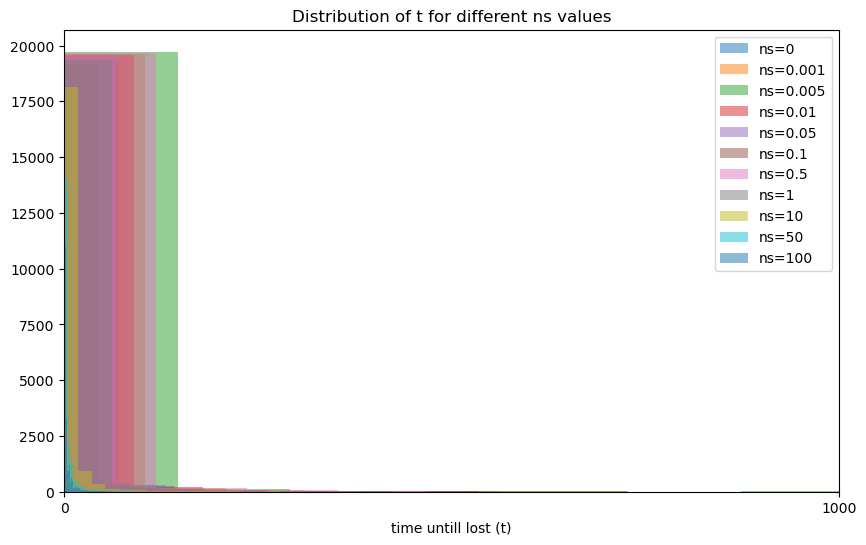

In [11]:

# Ensure 't' column is numeric
combined_df['t'] = pd.to_numeric(combined_df['t'], errors='coerce')

# Drop rows with NaN values in 't' column
combined_df = combined_df.dropna(subset=['t'])

# Plot the distribution of t for all ns
plt.figure(figsize=(10, 6))
for n in ns:
    subset = combined_df[combined_df['ns'] == n]
    plt.hist(subset['t'], bins=100, alpha=0.5, label=f'ns={n}')

plt.xlabel('time untill lost (t)')
plt.title('Distribution of t for different ns values')
plt.xticks(np.arange(0, combined_df['t'].max() + 500, 1000))
plt.xlim(0, 1000)
plt.legend()
plt.show()


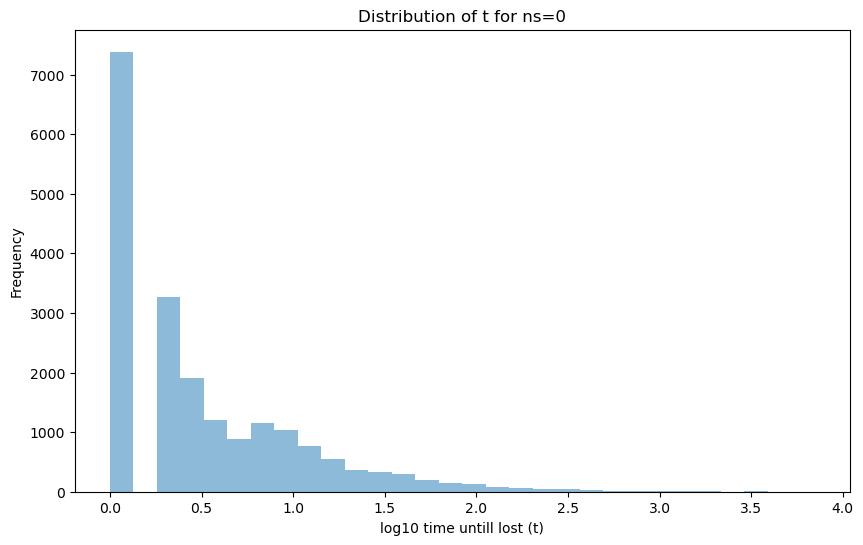

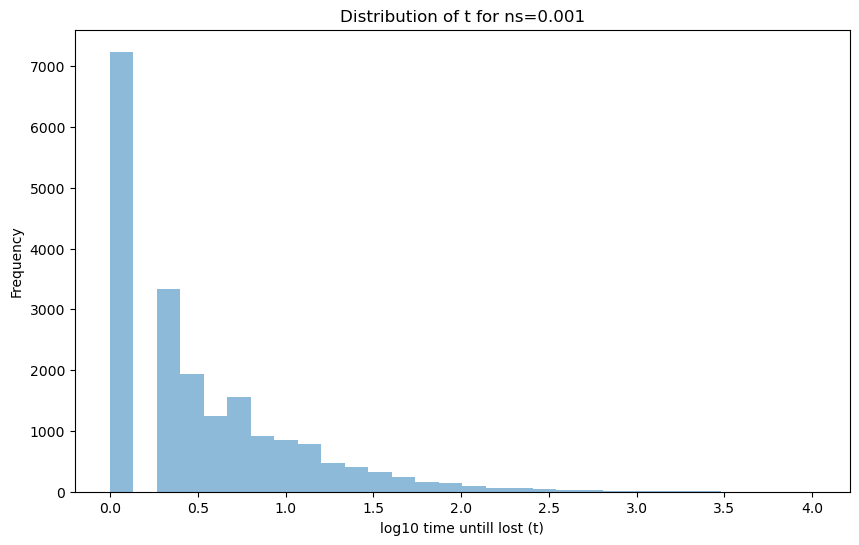

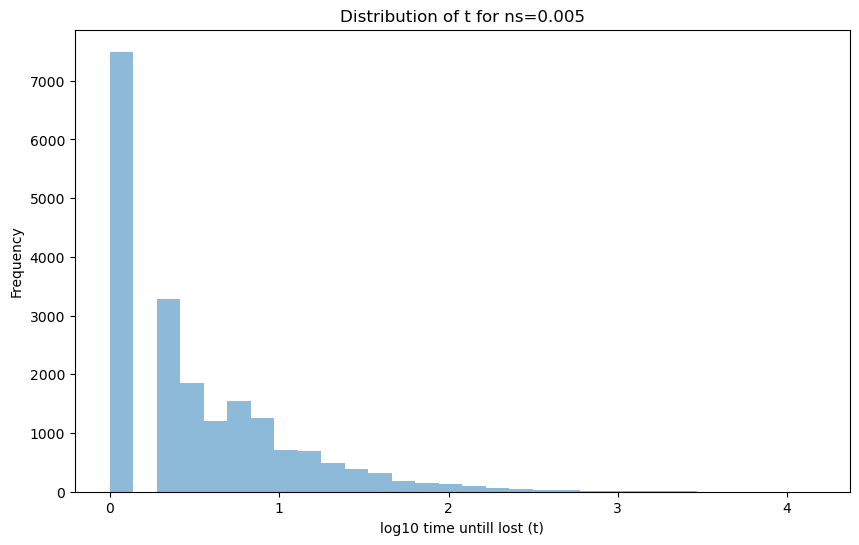

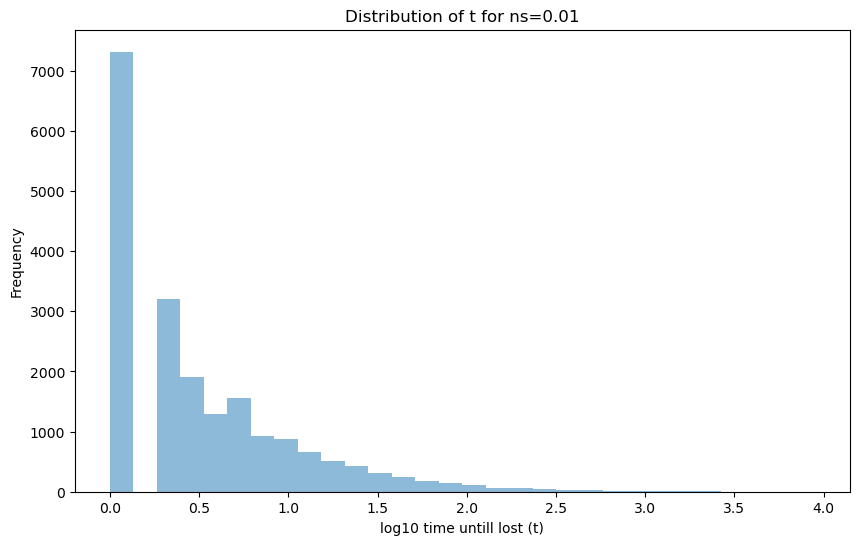

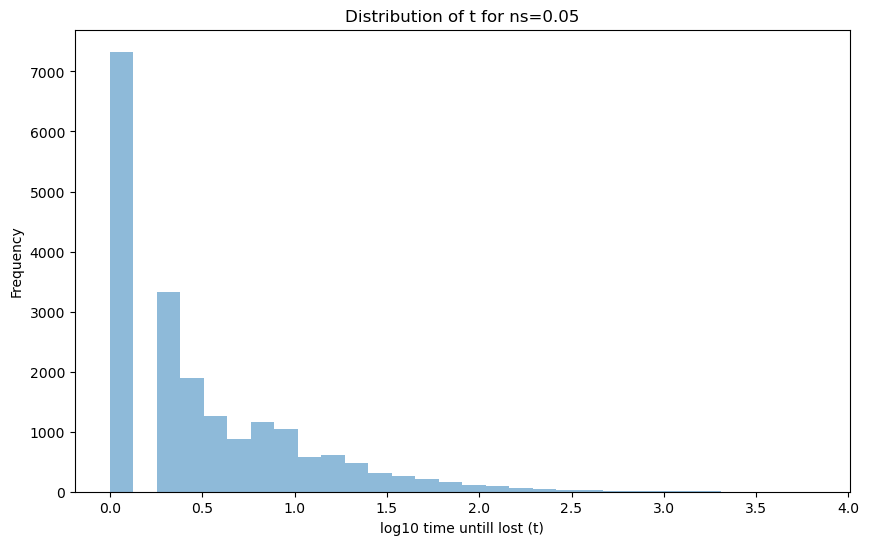

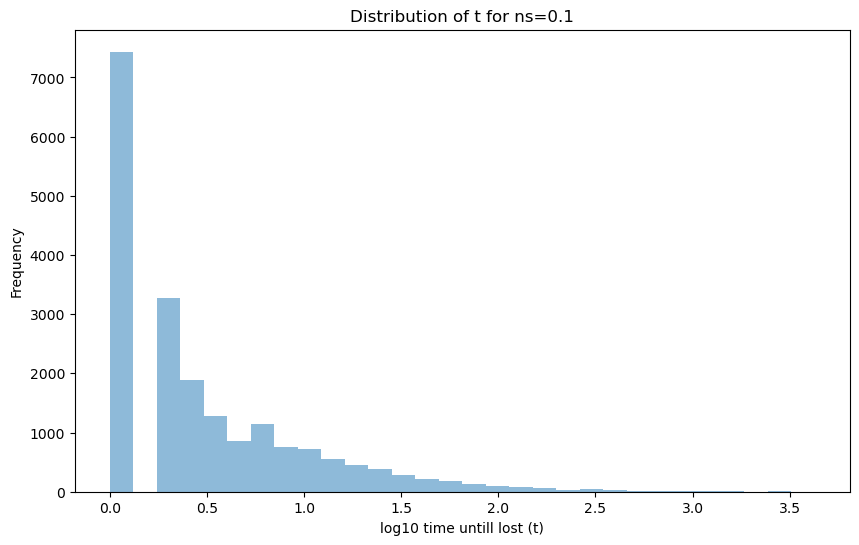

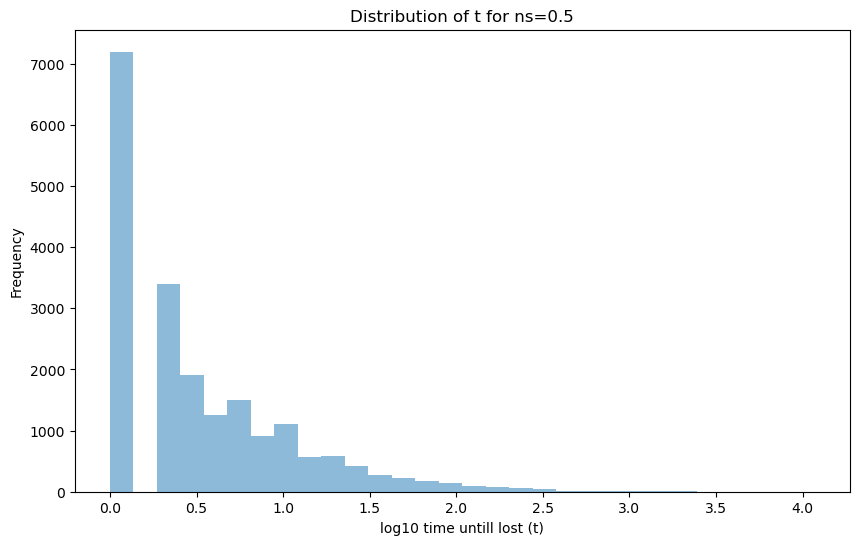

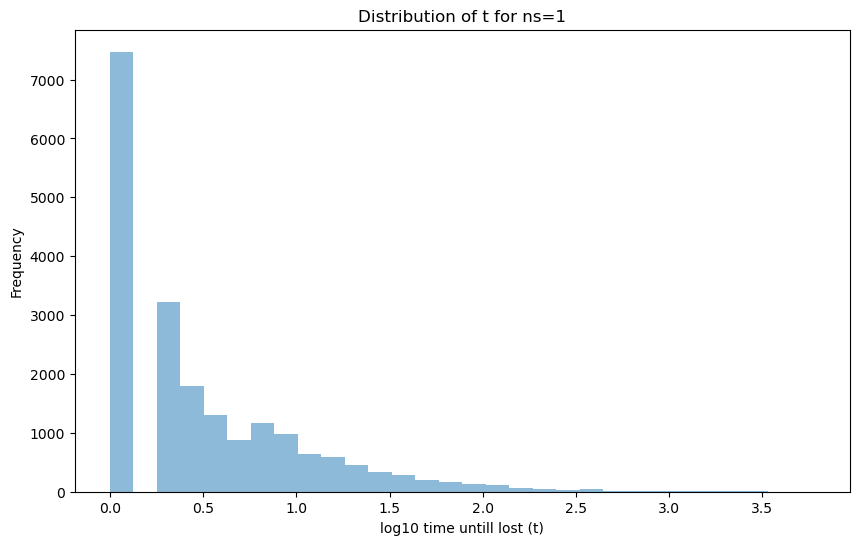

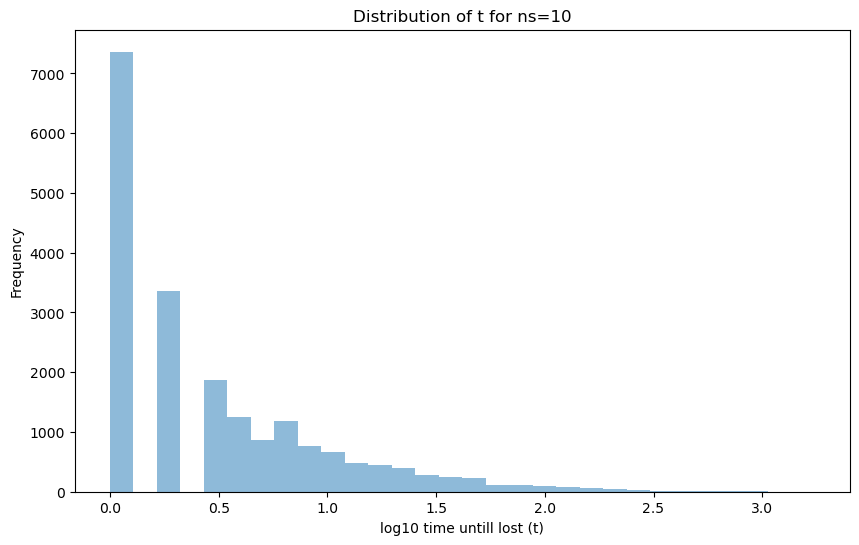

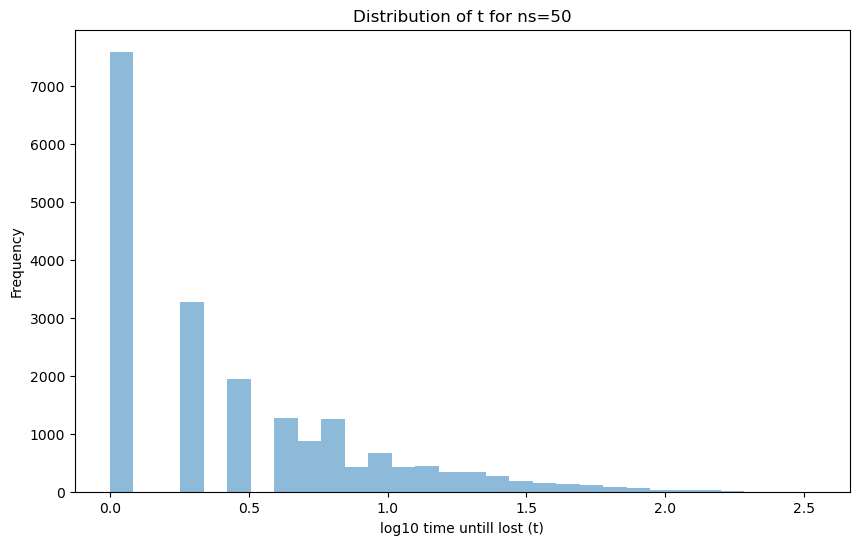

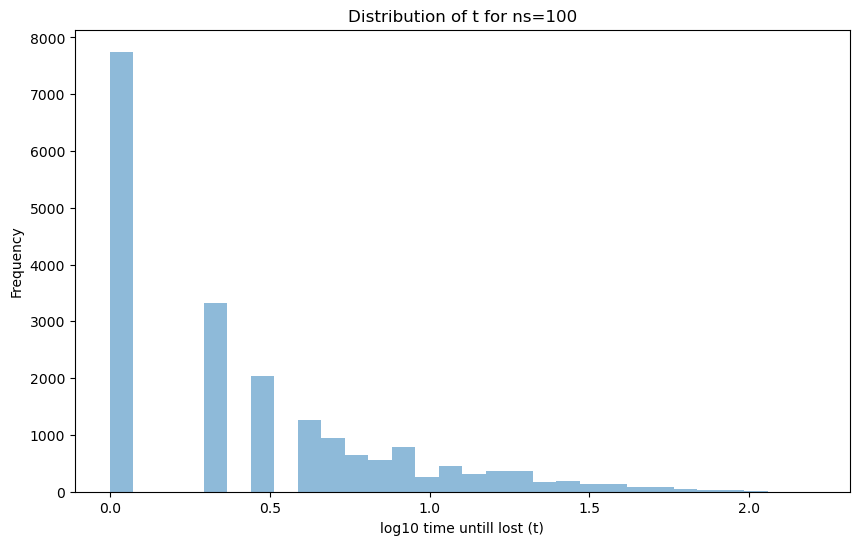

In [41]:

# Create individual plots for each ns
for n in ns:
    subset = combined_df[combined_df['ns'] == n]
    plt.figure(figsize=(10, 6))
    plt.hist(np.log10(subset['t']), bins=30, alpha=0.5)
    plt.xlabel('log10 time untill lost (t)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of t for ns={n}')
    plt.show()

In [19]:
# Ensure 't' column is numeric
combined_df['count'] = pd.to_numeric(combined_df['count'], errors='coerce')

# Drop rows with NaN values in 't' column
combined_df = combined_df.dropna(subset=['count'])


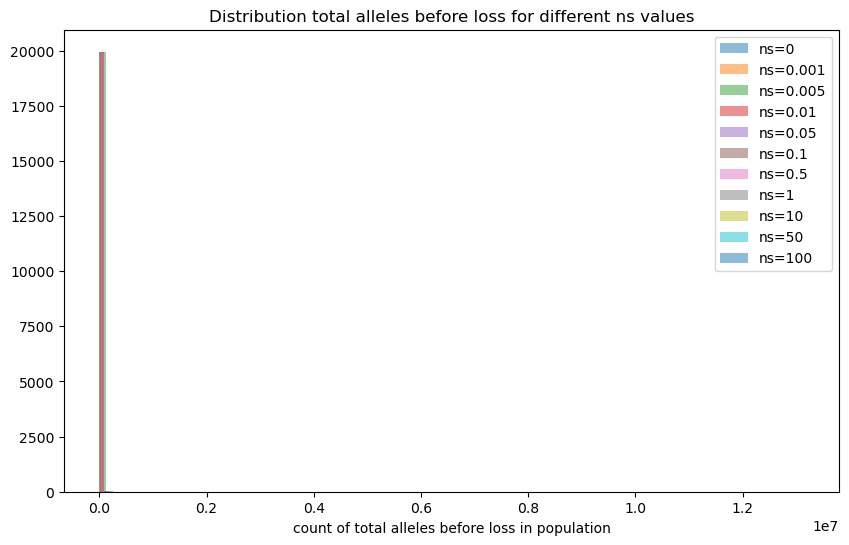

In [21]:

# Plot the distribution of t for all ns
plt.figure(figsize=(10, 6))
for n in ns:
    subset = combined_df[combined_df['ns'] == n]
    plt.hist(subset['count'], bins=100, alpha=0.5, label=f'ns={n}')

plt.xlabel('count of total alleles before loss in population')
plt.title('Distribution total alleles before loss for different ns values')
plt.legend()
plt.show()

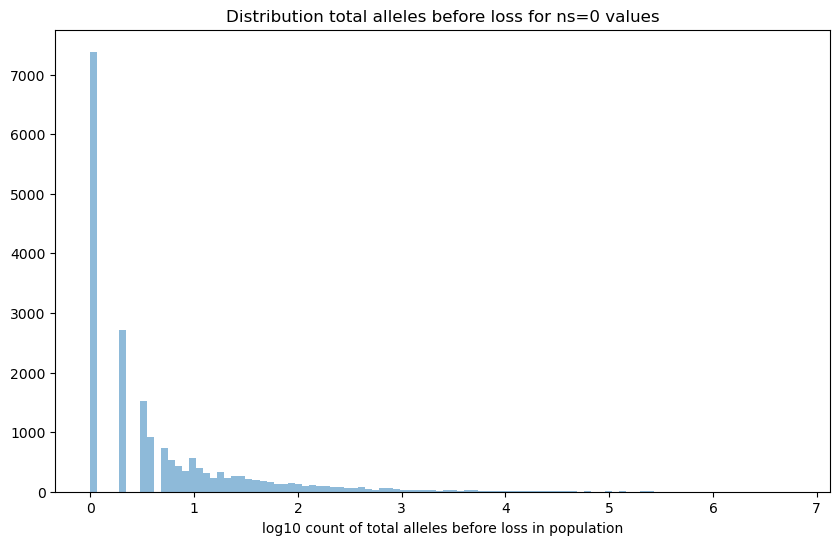

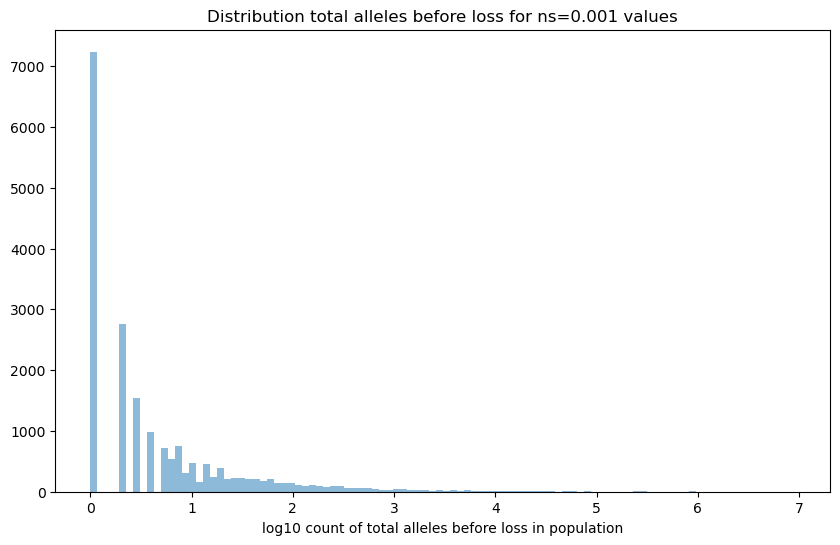

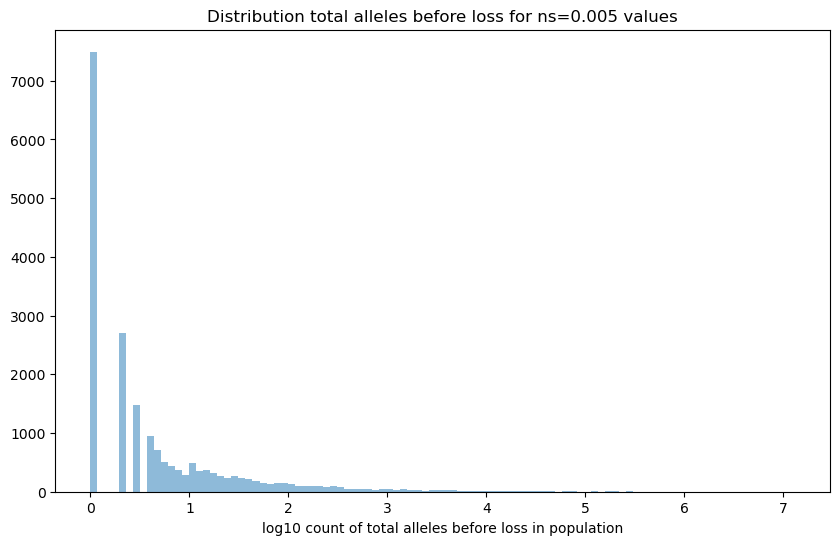

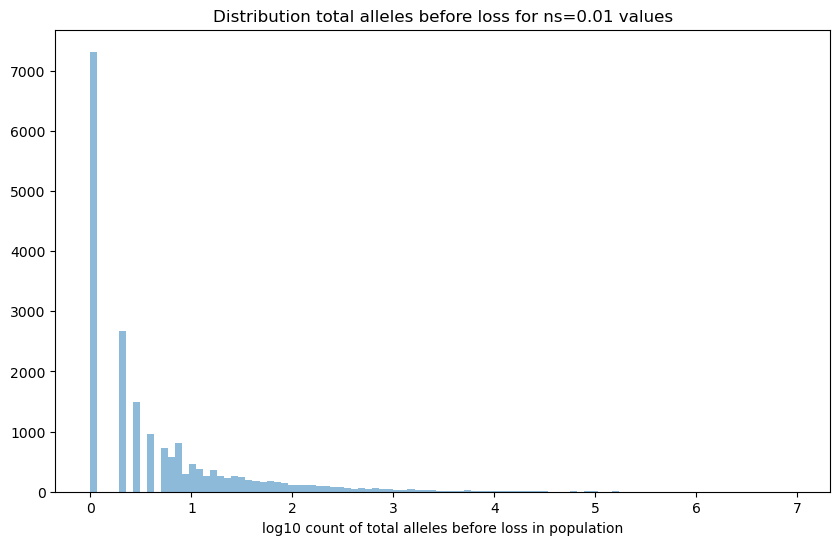

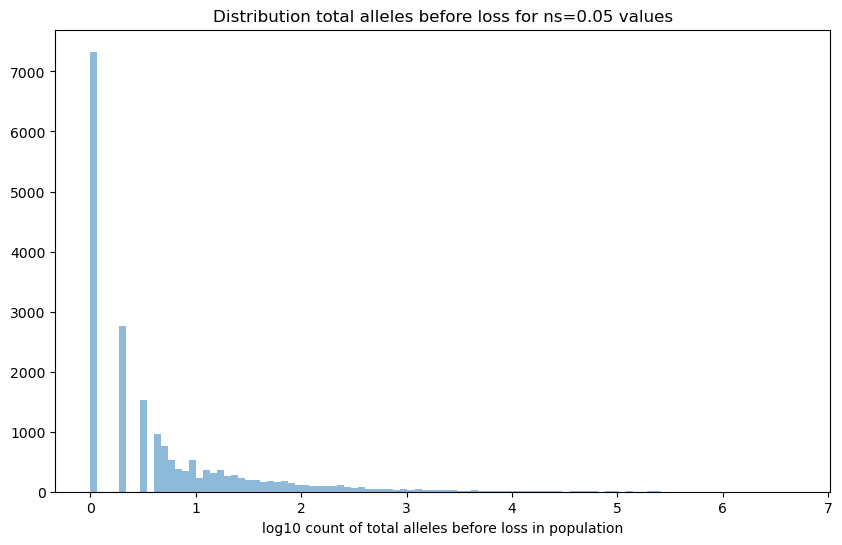

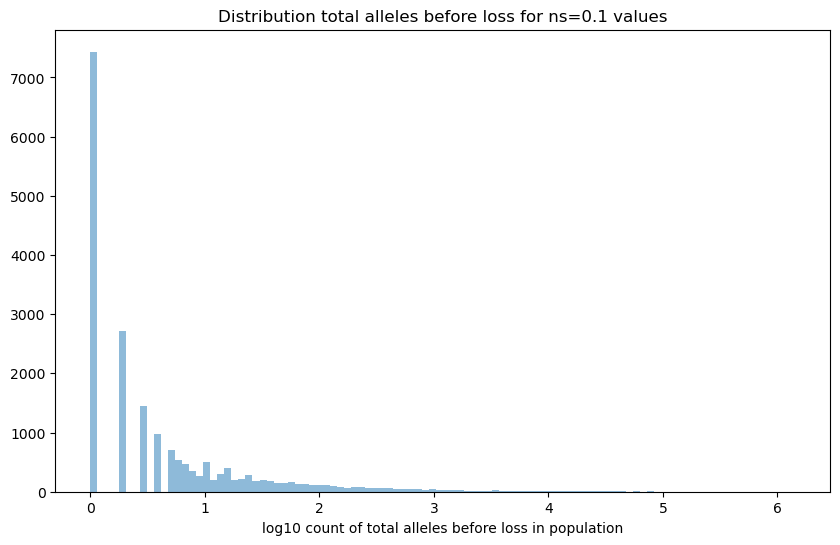

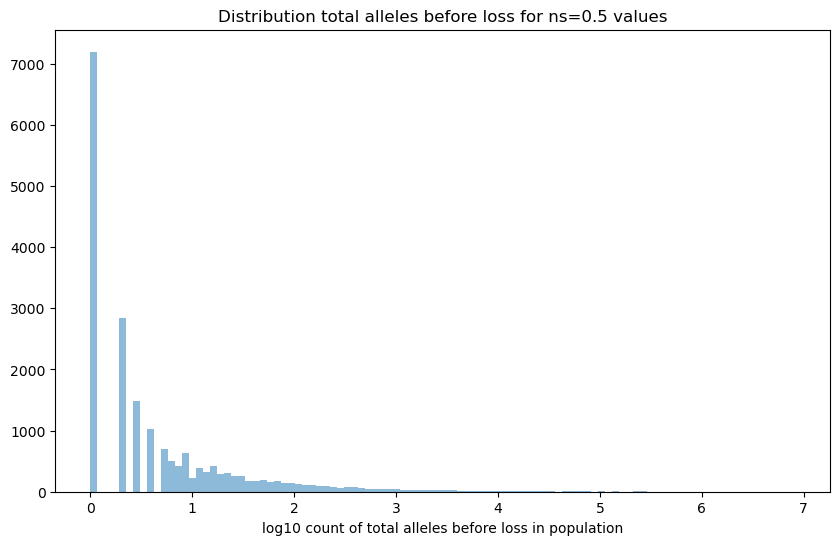

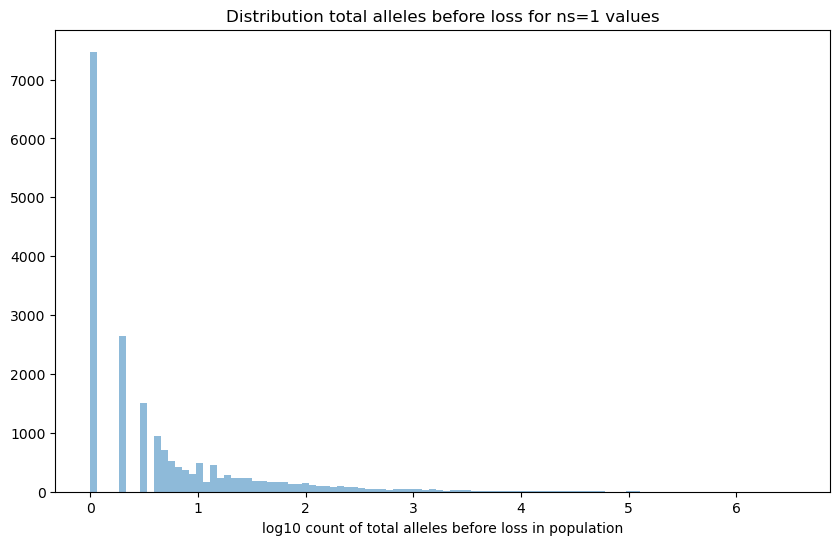

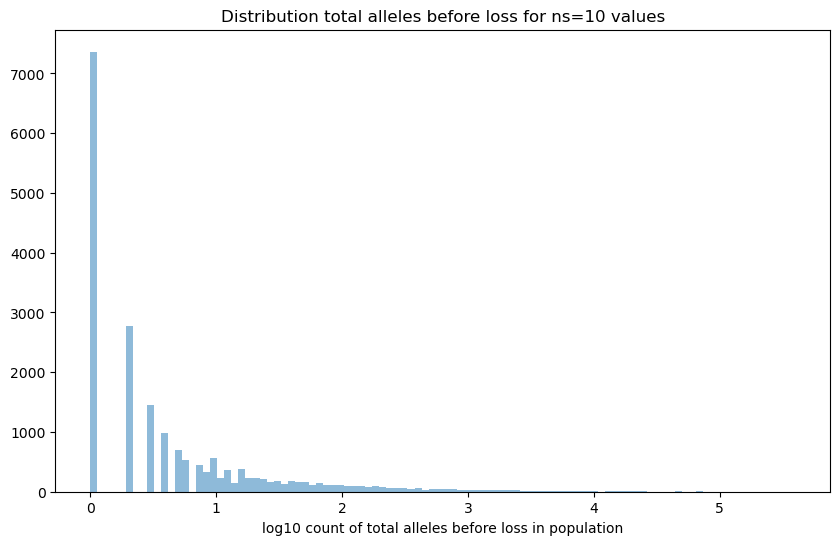

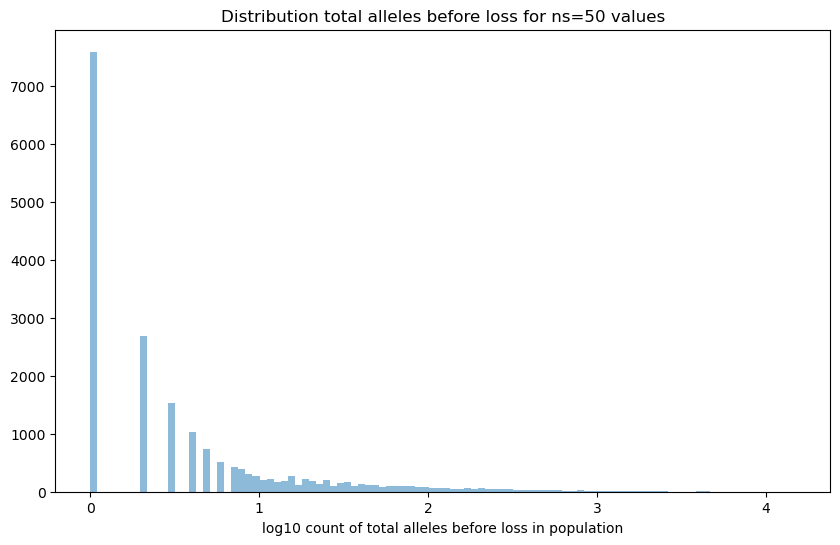

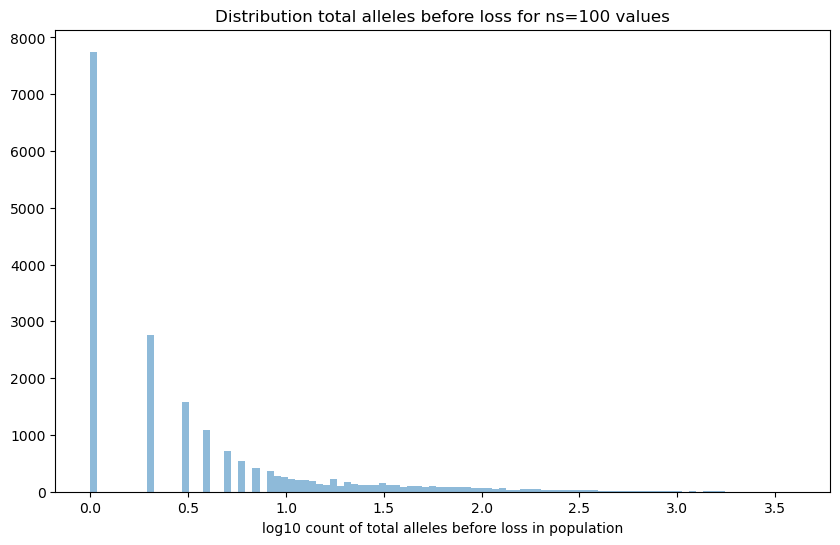

In [23]:

# Create individual plots for each ns
for n in ns:
    subset = combined_df[combined_df['ns'] == n]
    plt.figure(figsize=(10, 6))
    plt.hist(np.log10(subset['count']), bins=100, alpha=0.5)
    plt.xlabel('log10 count of total alleles before loss in population')
    plt.title(f'Distribution total alleles before loss for ns={n} values')
    plt.show()

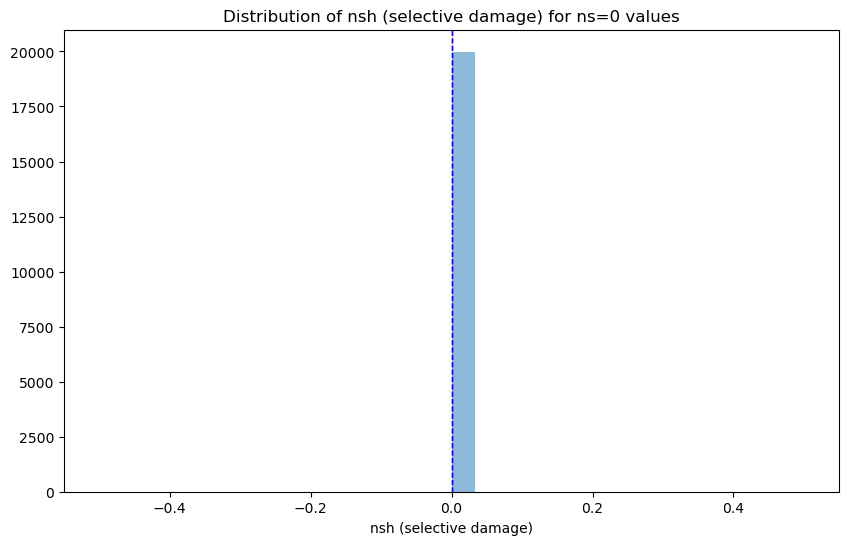

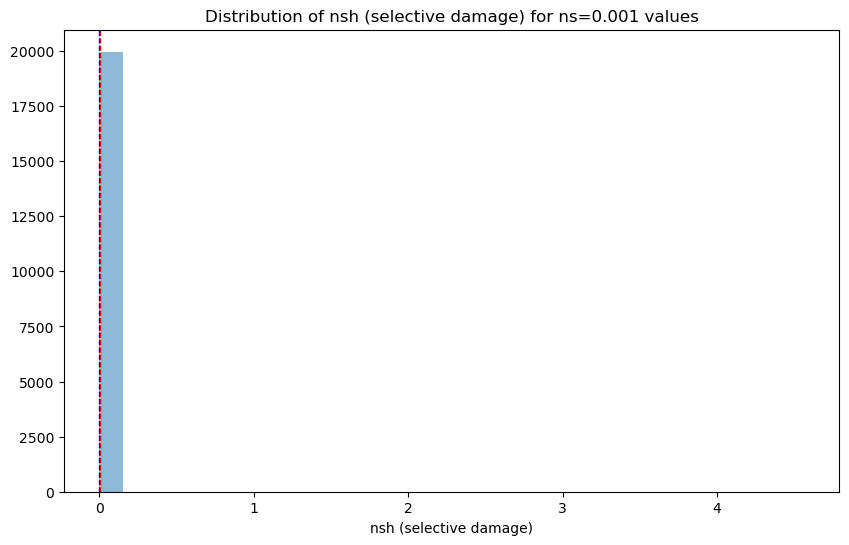

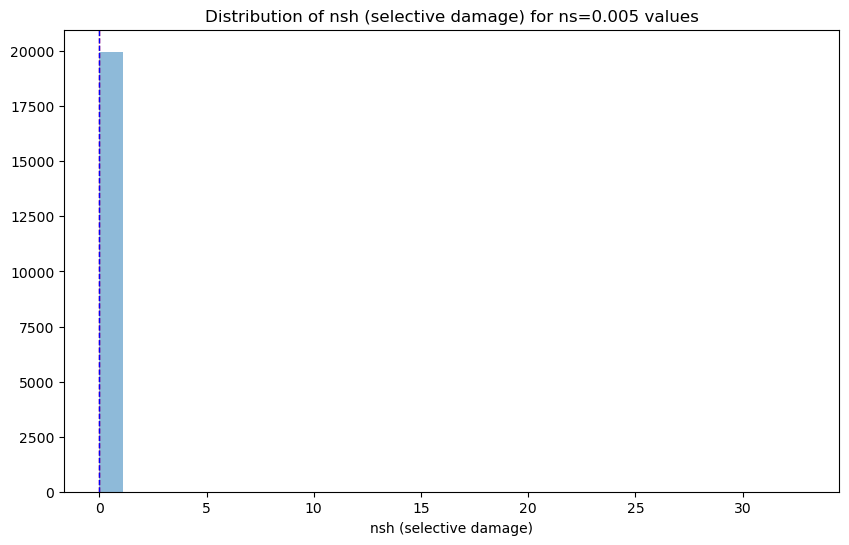

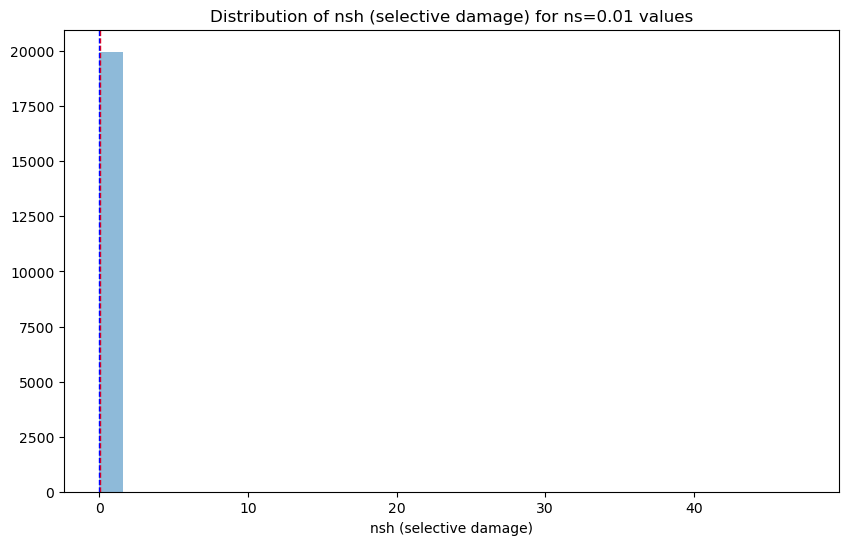

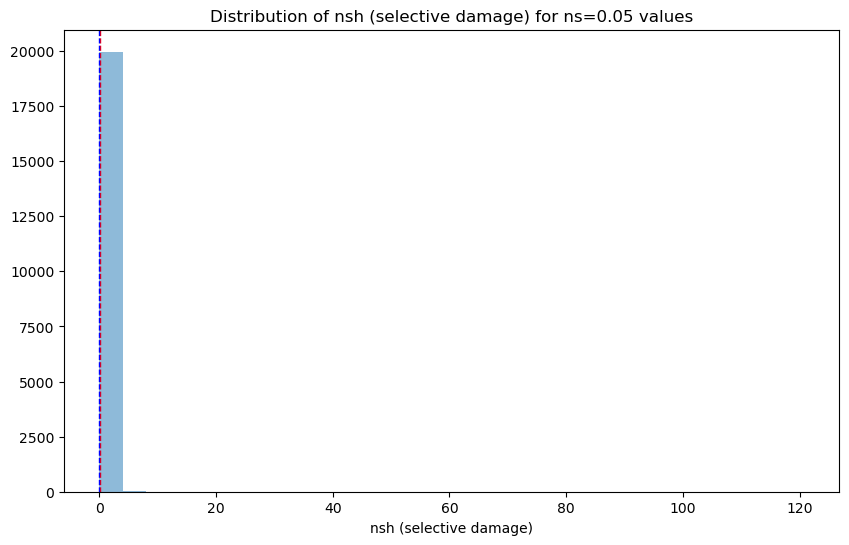

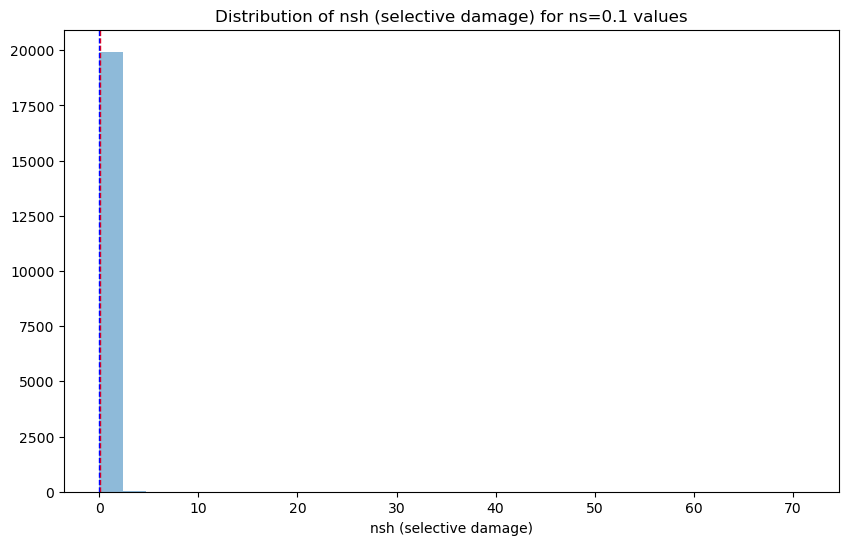

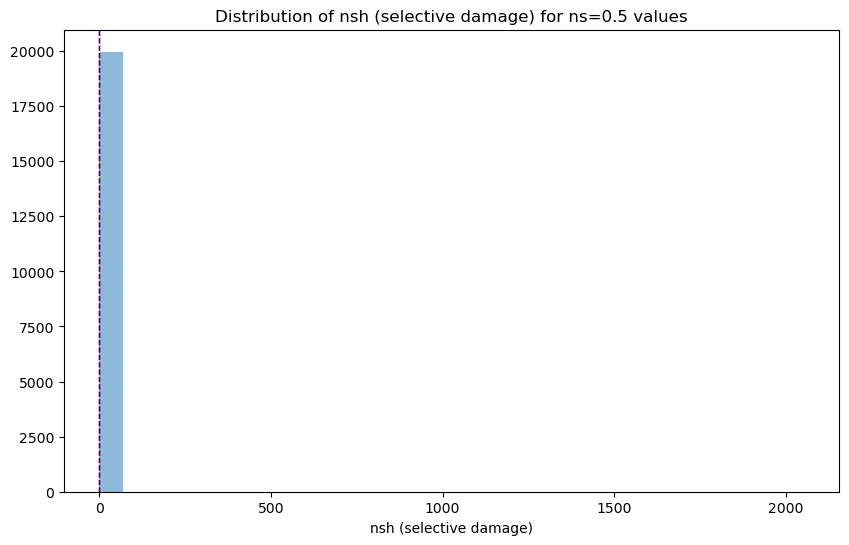

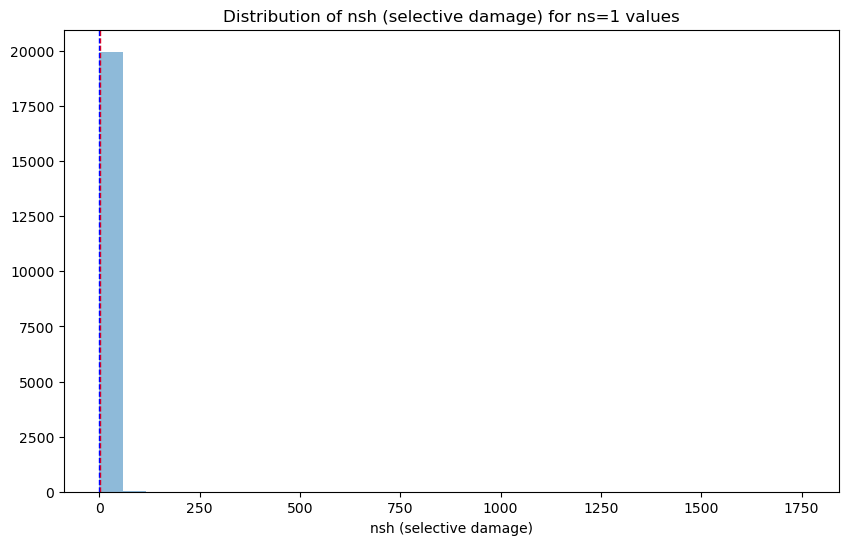

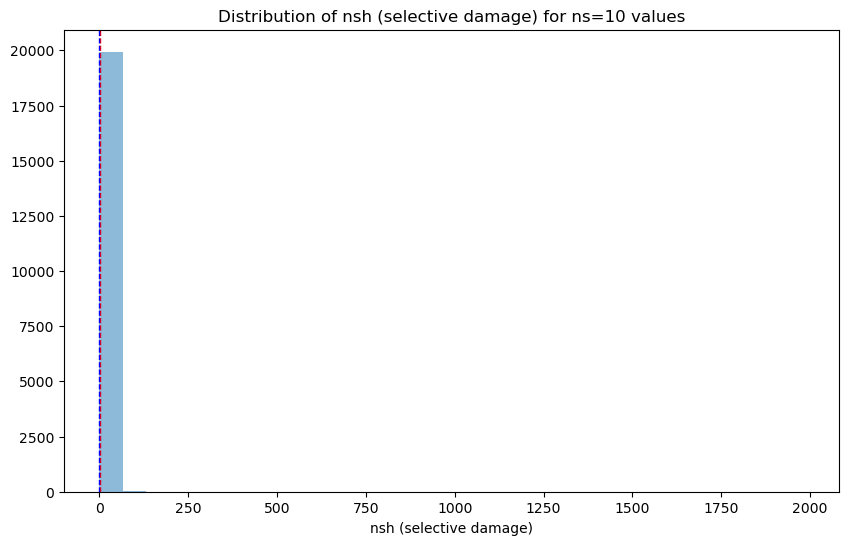

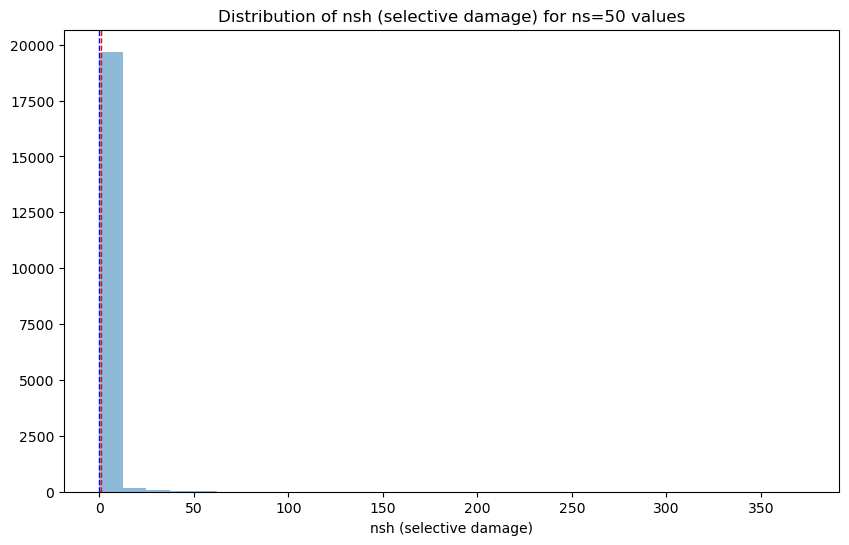

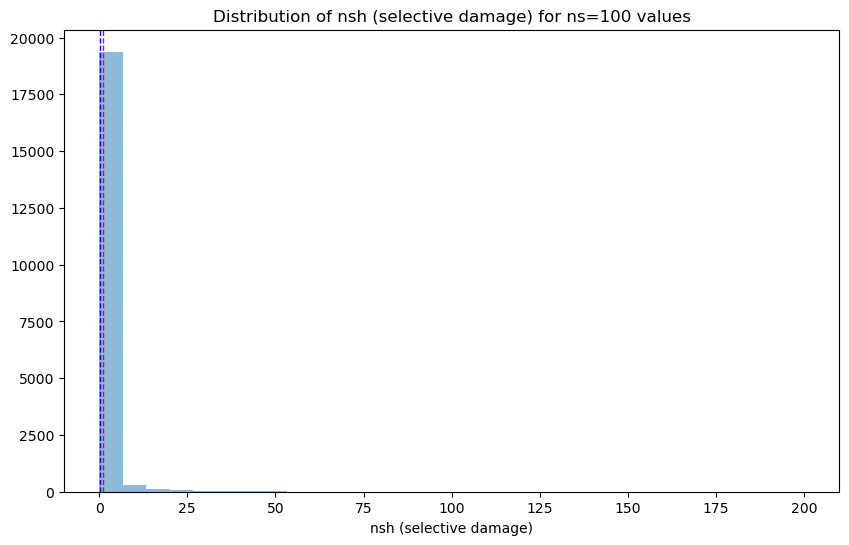

In [24]:
# Create individual plots for each ns
for n in ns:
    subset = combined_df[combined_df['ns'] == n]
    plt.figure(figsize=(10, 6))
    plt.hist(subset['count']*subset['s']*subset['h'], bins=30, alpha=0.5)
    plt.axvline((subset['count']*subset['s']*subset['h']).mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline((subset['count']*subset['s']*subset['h']).median(), color='blue', linestyle='dashed', linewidth=1)
    plt.xlabel('nsh (selective damage)')
    plt.title(f'Distribution of nsh (selective damage) for ns={n} values')
    plt.show()

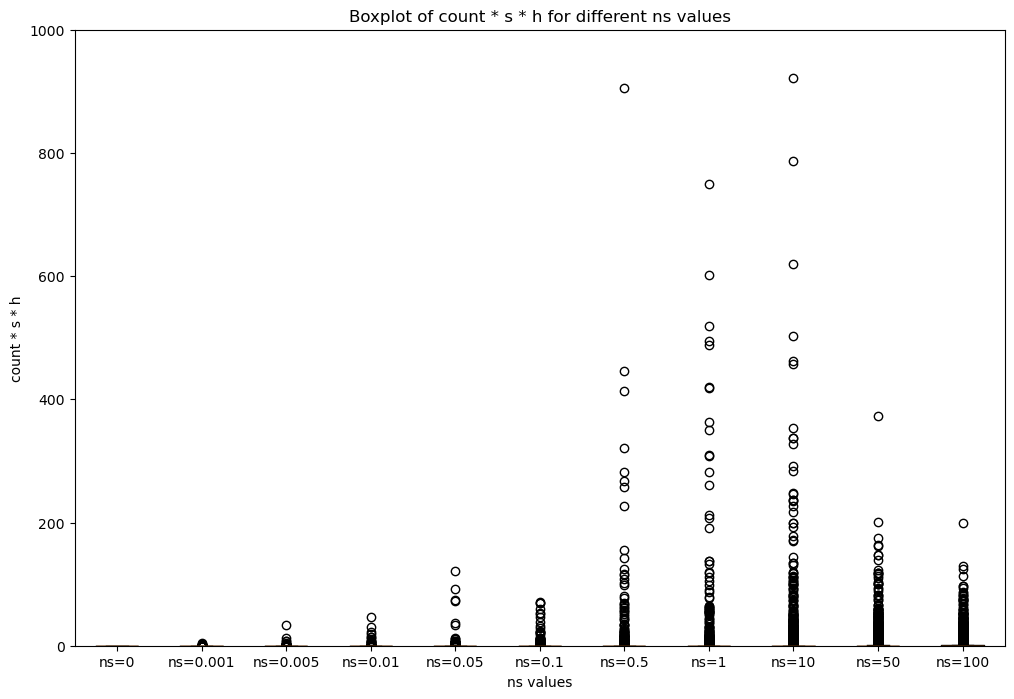

In [25]:
for n in ns:
    # Create a boxplot for each distribution of subset['count']*subset['s']*subset['h'] for each ns
    data = [combined_df[combined_df['ns'] == n]['count'] * combined_df[combined_df['ns'] == n]['s'] * combined_df[combined_df['ns'] == n]['h'] for n in ns]
plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=[f'ns={n}' for n in ns])
plt.xlabel('ns values')
plt.ylabel('count * s * h')
plt.ylim(0, 1e3)
plt.title('Boxplot of count * s * h for different ns values')
plt.show()

In [26]:
ns100 = combined_df[combined_df['ns'] == 100]


In [1]:
(sum(ns100['count'])/10000)*0.1

NameError: name 'ns100' is not defined

In [28]:
ns1 = combined_df[combined_df['ns'] == 1]
(sum(ns1['count'])/10000)*0.001

2.4539983000000003

In [29]:
ns001 = combined_df[combined_df['ns'] == 0.01]
(sum(ns001['count'])/10000)*0.00001

0.04860213800000001

In [30]:
ns10 = combined_df[combined_df['ns'] == 10]
(sum(ns10['count'])/10000)*0.01

4.716975

In [31]:
ns01 = combined_df[combined_df['ns'] == 0.1]
(sum(ns01['count'])/10000)*0.0001

0.2061924

In [34]:
ns0 = combined_df[combined_df['ns'] == 1]


In [35]:
ns0

,t,count,n,s,h,ns
140000,7.0,10,1000,0.001,0.5,1.0
140001,4.0,5,1000,0.001,0.5,1.0
140002,6.0,6,1000,0.001,0.5,1.0
140003,1.0,1,1000,0.001,0.5,1.0
140004,1.0,1,1000,0.001,0.5,1.0
...,...,...,...,...,...,...
159995,1.0,1,1000,0.001,0.5,1.0
159996,6.0,14,1000,0.001,0.5,1.0
159997,1.0,1,1000,0.001,0.5,1.0
159998,2.0,2,1000,0.001,0.5,1.0


In [38]:
count_t_equals_1 = (combined_df['t'] == 2).sum()
count_t_equals_1/len(combined_df)

0.16490921740079392